In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#cascade 파일 읽기

face_cascade = cv2.CascadeClassifier('../Data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('../Data/haarcascade_eye.xml')

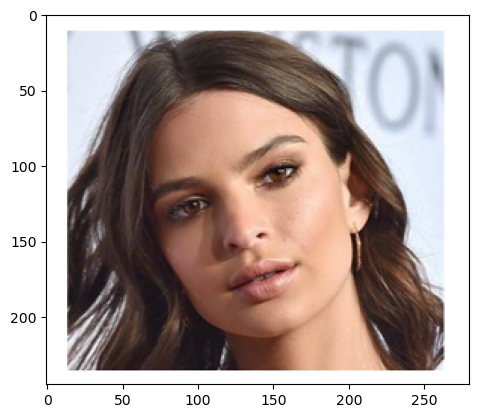

In [3]:
#얼굴 이미지 데이터 읽기
face_image = cv2.imread('../Data/face.png')
face_image_copy = face_image.copy()
face_image_copy = cv2.cvtColor(face_image_copy, cv2.COLOR_BGR2RGB)
#print(face_image)
face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB)

plt.imshow(face_image)
plt.show()

얼굴객체 인식 좌표>>> 49 48 161 161


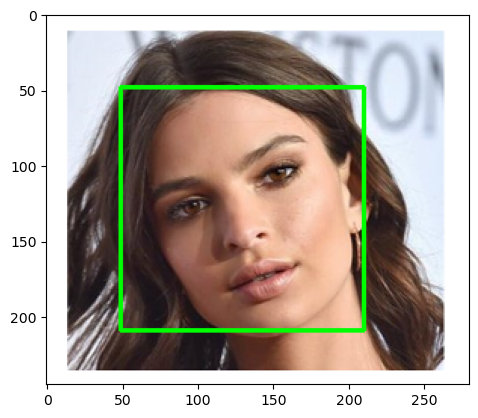

In [4]:
#얼굴 이미지 바운딩박스 처리하기 -> cascade의 경우 grayscale에서만 적용됨.

face_gray_image = cv2.cvtColor(face_image, cv2.COLOR_RGB2GRAY)

faces_box_info = face_cascade.detectMultiScale(face_gray_image, 1.1, 4)

#print(faces_box_info)

for (x,y,w,h) in faces_box_info:
    print('얼굴객체 인식 좌표>>>', x,y,w,h)
    cv2.rectangle(face_image, (x,y), (x+w, y+h), (0, 255,0), 2)

plt.imshow(face_image)
plt.show()

[[84 39 38 38]
 [31 64 32 32]]
0 84 39 38 38
1 31 64 32 32


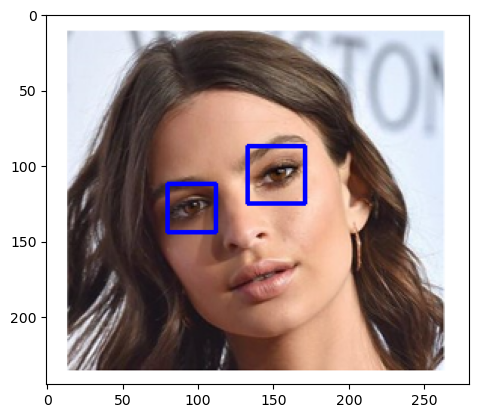

In [5]:
#눈 감지

roi_gray = face_gray_image[y:(y+h), x:(x+w)] #관심 영역, 위의 좌표에서 크롭해온 영역
roi_color = face_image_copy[y:(y+h), x:(x+w)] #마찬가지로 위 사진의 컬러 버전.

#print(roi_gray, roi_color)

eyes_box_info = eye_cascade.detectMultiScale(roi_gray)
print(eyes_box_info)

for i, (ex, ey, ew, eh) in enumerate(eyes_box_info):
    print(i, ex, ey, ew, eh)
    if i==0:
        eye_1 = (ex, ey, ew, eh)
    elif i==1:
        eye_2 = (ex, ey, ew, eh)
        
    cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 0, 255), 2)
    
plt.imshow(face_image_copy)
plt.show()
#plt.imshow(roi_gray, 'gray')
#plt.show()

#plt.imshow(roi_color)
#plt.show()

In [6]:
#얼굴 정렬

print(eye_1[0], eye_2[0])

if eye_1[0] < eye_2[0]:
    left_eye = eye_1
    right_eye = eye_2
else:
    left_eye = eye_2
    right_eye = eye_1
    
print(left_eye, right_eye)

84 31
(31, 64, 32, 32) (84, 39, 38, 38)


left eye center 좌표>>> 47 80
right eye center 좌표>>> 103 58


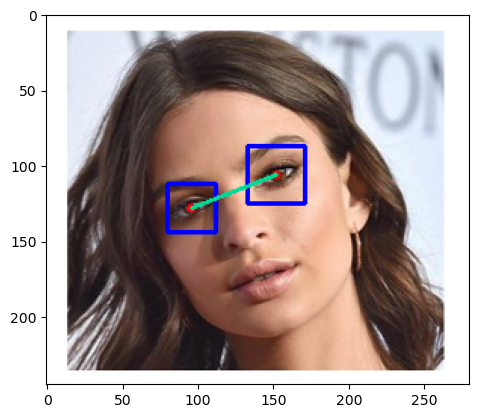

In [11]:
#공식 ppt에 있음.

left_eye_center = (int(left_eye[0] + (left_eye[2] / 2)), int(left_eye[1] + (left_eye[3] / 2)))
left_eye_center_x = left_eye_center[0]
left_eye_center_y = left_eye_center[1]

print('left eye center 좌표>>>',left_eye_center_x, left_eye_center_y)

right_eye_center = (int(right_eye[0] + (right_eye[2] / 2)), int(right_eye[1] + (right_eye[3] / 2)))
right_eye_center_x = right_eye_center[0]
right_eye_center_y = right_eye_center[1]

print('right eye center 좌표>>>', right_eye_center_x, right_eye_center_y)

#눈에 써클 찍어보기
cv2.circle(roi_color, left_eye_center, 3, (255,0,0), -1)
cv2.circle(roi_color, right_eye_center, 3, (255,0,0), -1)

#선 그어보기
cv2.line(roi_color, left_eye_center, right_eye_center, (0,220,150), 2)

plt.imshow(face_image_copy)
plt.show()

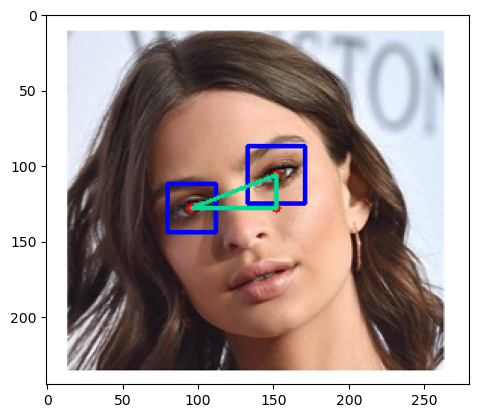

In [14]:
if left_eye_center_y > right_eye_center_y:
    A = (right_eye_center_x, left_eye_center_y)
    direction = -1
else:
    A = (left_eye_center_x, right_eye_center_y)
    direction = 1
    
cv2.circle(roi_color, A, 3, (255,0,0), -1)

cv2.line(roi_color, left_eye_center, A, (0,220,150), 2)
cv2.line(roi_color, right_eye_center, A, (0,220,150), 2)

plt.imshow(face_image_copy)
plt.show()

In [15]:
# 각도 구하기

delta_x = right_eye_center_x - left_eye_center_x
delta_y = right_eye_center_y - left_eye_center_y

angle = np.arctan(delta_y / delta_x)
angle = (angle*100) / np.pi
print(angle)


-11.915409070614084


이미지 height, width 값>> 245 280 3
image center values>> (140, 122)
[[  0.97845349  -0.20646734  28.20552606]
 [  0.20646734   0.97845349 -26.2767534 ]]


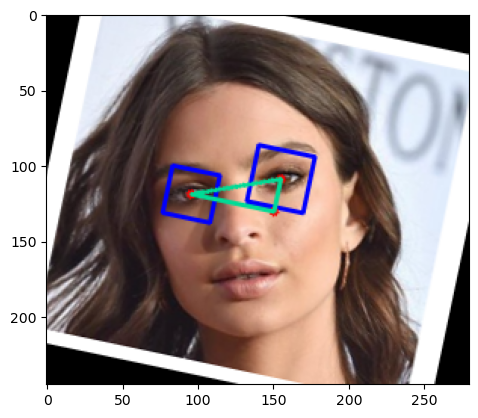

In [21]:
#이미지를 각도 세타만큼 회전시키기.

height, width, _ = face_image_copy.shape
print("이미지 height, width 값>>", height, width, _)

image_center = (width // 2, height // 2)
print("image center values>>", image_center)

M = cv2.getRotationMatrix2D(image_center, (angle), 1.0)
print(M)

Rotated = cv2.warpAffine(face_image_copy, M, (width, height))

plt.imshow(Rotated)
plt.show()